# DATA Processing

The purpose of this Notebook is to perform the data processing steps for each sample:

- DP1 : Substraction
- DP2 : Gaussian fitting

One aim is to make this Notebook working within an html page and interactive using ipython widget

## Workflow

In [1]:
#

To create (drag and drop image when produced)

### Libraries

In [2]:
import numpy 
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
from glob import glob
from functools import reduce
import ipywidgets as widgets
import matplotlib.gridspec as gridspec
from ipywidgets import interact
import re
from cycler import cycler
import seaborn as sns
import matplotlib.gridspec as gridspec
import pylab

from lmfit.models import ExponentialModel, GaussianModel


In [3]:
%matplotlib

Using matplotlib backend: Qt5Agg


# 0 Input parameters

Not use (but here just in case)

Take time to describe method used with respect to previous Notebook (Improvement - Emphase on python teaching)

## Sample  type

In [4]:
# 0.1 Date

date = "2020_09_16"

# 0.2 XP
    # Can take value XP_1-1, XP_1-2 

XP = "XP_1-1"

# 0.3 Sample type
    # Can take value ASW, C2H6, C2H6_ASW

spl = "ASW"



## Sample annex 

For quick sample comparison (max 3 sample named 2-3-4)

In [5]:
date2 = "2020_09_28"
date3 = "2020_09_17"
date4 = "2020_09_21"


# <span style='background :yellow' > $\color{green}{\text{DP1 : Sample Checking}}$ </span>

# 1.1 DATA Import

The Data processing routine is performed per sample. 

A date is set as input

from the previous data analysis, summarized in the following document below, we have identified 4 temeperature ranges where the sample undergo different physical processes.

[XP1_Plan](D:\PhD-WS\Projects\PAC\Document\Reports\XP1_Plan.docx)

So the purpose here is to chop the data with respect to those ranges before to perform the Substraction

Experimental ranges (in T):

- Range 1: 20 - 100K
- Range 2: 100 to 130K
- Range 3: 130K - 140K
- Range 4: Beyond 140K


I want to extract the temperature ramp info from XP Ramp:


## 1.1.1 XP-Ramp

In [6]:
XP_Ramp_df = pd.read_csv('D:\DATA-Processing\PAC\XP_list_test.csv')
XP_Ramp_df_I = XP_Ramp_df.set_index('Date')

FileNotFoundError: [Errno 2] File D:\DATA-Processing\PAC\XP_list_test.csv does not exist: 'D:\\DATA-Processing\\PAC\\XP_list_test.csv'

In [6]:
#XP_Ramp_df_I.head(5)

## 1.1.2 DR1, DR2, DR3

###  DR1 (Date)

In [7]:
DR1_Allscan_df = pd.read_csv("D:\DATA-Processing\PAC\{}/Samples/{}/Data/DR/DR1_{}_All-scans.csv".format(XP,date,date))
DR1_Allscan_df = DR1_Allscan_df.T.iloc[1:].T

In [8]:
#DR1_Allscan_df

###  DR1 (Date Annex)

In [9]:
DR1_Allscan_df_2 = pd.read_csv("D:\DATA-Processing\PAC\{}/Samples/{}/Data/DR/DR1_{}_All-scans.csv".format(XP,date2,date2))
DR1_Allscan_df_3 = pd.read_csv("D:\DATA-Processing\PAC\{}/Samples/{}/Data/DR/DR1_{}_All-scans.csv".format(XP,date3,date3))
DR1_Allscan_df_4 = pd.read_csv("D:\DATA-Processing\PAC\{}/Samples/{}/Data/DR/DR1_{}_All-scans.csv".format(XP,date4,date4))


DR1_Allscan_df_2 = DR1_Allscan_df_2.T.iloc[1:].T
DR1_Allscan_df_3 = DR1_Allscan_df_3.T.iloc[1:].T
DR1_Allscan_df_4 = DR1_Allscan_df_4.T.iloc[1:].T

In [10]:
#DR1_Allscan_df_2

###  DR2 (Date)

In [11]:
DR2_Allscan_df = pd.read_csv('D:\DATA-Processing\PAC\{}/Samples/{}/Data/DR/DR2_{}_All-scans.csv'.format(XP, date, date))
DR2_Allscan_df = DR2_Allscan_df.T.iloc[1:].T

In [12]:
#DR2_Allscan_df

###  DR2 (Date Annex)

In [13]:
DR2_Allscan_df_2 = pd.read_csv('D:\DATA-Processing\PAC\{}/Samples/{}/Data/DR/DR2_{}_All-scans.csv'.format(XP, date2, date2))
DR2_Allscan_df_3 = pd.read_csv('D:\DATA-Processing\PAC\{}/Samples/{}/Data/DR/DR2_{}_All-scans.csv'.format(XP, date3, date3))
DR2_Allscan_df_4 = pd.read_csv('D:\DATA-Processing\PAC\{}/Samples/{}/Data/DR/DR2_{}_All-scans.csv'.format(XP, date4, date4))

DR2_Allscan_df_2 = DR2_Allscan_df_2.T.iloc[1:].T
DR2_Allscan_df_3 = DR2_Allscan_df_3.T.iloc[1:].T
DR2_Allscan_df_4 = DR2_Allscan_df_4.T.iloc[1:].T

In [14]:
#DR2_Allscan_df_2

###  DR3 (Date)

In [15]:
DR3_Allscan_df = pd.read_csv("D:\DATA-Processing\PAC\{}/Samples/{}/Data/DR/DR3_{}_A.csv".format(XP,date,date))
DR3_Allscan_df = DR3_Allscan_df.T.iloc[1:].T

In [16]:
#DR3_Allscan_df

###  DR3 (Date Annex)

In [17]:
DR3_Allscan_df_2 = pd.read_csv("D:\DATA-Processing\PAC\{}/Samples/{}/Data/DR/DR3_{}_A.csv".format(XP,date2,date2))
DR3_Allscan_df_3 = pd.read_csv("D:\DATA-Processing\PAC\{}/Samples/{}/Data/DR/DR3_{}_A.csv".format(XP,date3,date3))
DR3_Allscan_df_4 = pd.read_csv("D:\DATA-Processing\PAC\{}/Samples/{}/Data/DR/DR3_{}_A.csv".format(XP,date4,date4))

DR3_Allscan_df_2 = DR3_Allscan_df_2.T.iloc[1:].T
DR3_Allscan_df_3 = DR3_Allscan_df_3.T.iloc[1:].T
DR3_Allscan_df_4 = DR3_Allscan_df_4.T.iloc[1:].T

## 1.3 Data_annex

### 1.2.1 Import

In [23]:
#Date

data_anex_df = pd.read_csv("D:\DATA-Processing\PAC\{}/Samples/{}/Data/DR/{}_data_annex.csv".format(XP,date,date))

#Date Annex

data_anex_df_2 = pd.read_csv("D:\DATA-Processing\PAC\{}/Samples/{}/Data/DR/{}_data_annex.csv".format(XP,date2,date2))
data_anex_df_3 = pd.read_csv("D:\DATA-Processing\PAC\{}/Samples/{}/Data/DR/{}_data_annex.csv".format(XP,date3,date3))
data_anex_df_4 = pd.read_csv("D:\DATA-Processing\PAC\{}/Samples/{}/Data/DR/{}_data_annex.csv".format(XP,date4,date4))

In [24]:
data_anex_df

,Name,min1,index1,min2,index2,min3,index3,min4,index4,min5,...,maxA0w,maxBi,maxB,maxBw,maxCi,maxC,maxCw,Int_A,Int_C,Int_N_A
0,ASW_2020_09_16_1,-0.018844,6636,-0.008464,4235,-0.008369,4139,-0.001418,2403,-0.000786,...,3268.321,2945,0.009284,2219.700,1773,0.023557,1654.651,95.913079,6.952239,100.000000
1,ASW_2020_09_16_2,-0.017376,6636,-0.006804,4235,-0.006714,4139,0.000216,2432,0.000863,...,3264.464,2945,0.009251,2219.700,1771,0.023602,1653.686,96.271574,7.064048,100.373772
2,ASW_2020_09_16_3,-0.015208,6636,-0.005247,4197,-0.005165,4130,0.001310,2413,0.001796,...,3264.464,2947,0.010343,2220.665,1754,0.024362,1645.490,98.372535,7.669780,102.564255
3,ASW_2020_09_16_4,-0.014749,6631,-0.004931,4197,-0.004867,4130,0.001626,2413,0.002152,...,3264.464,2947,0.010512,2220.665,1754,0.024289,1645.490,98.949916,7.710412,103.166239
4,ASW_2020_09_16_5,-0.014274,6620,-0.004424,4245,-0.004362,4130,0.002212,2413,0.002702,...,3264.464,2947,0.010562,2220.665,1754,0.024293,1645.490,99.128959,7.740047,103.352911
5,ASW_2020_09_16_6,-0.013616,6636,-0.003845,4235,-0.003754,4139,0.003361,2444,0.003725,...,3255.303,2949,0.010078,2221.629,1756,0.023139,1646.454,102.427355,8.047927,106.791854
6,ASW_2020_09_16_7,-0.013178,6632,-0.003492,4235,-0.003383,4139,0.003972,2425,0.004340,...,3255.303,2951,0.010252,2222.593,1756,0.022505,1646.454,103.570509,8.057326,107.983719
7,ASW_2020_09_16_8,-0.012907,6632,-0.003190,4235,-0.003086,4139,0.004323,2406,0.004697,...,3255.303,2951,0.010345,2222.593,1756,0.022478,1646.454,103.920588,8.069566,108.348714
8,ASW_2020_09_16_9,-0.013285,6636,-0.002969,4245,-0.002883,4139,0.004149,2415,0.004730,...,3251.446,2959,0.011390,2226.450,1754,0.022548,1645.490,106.316388,8.023931,110.846602
9,ASW_2020_09_16_10,-0.013301,6636,-0.002779,4216,-0.002666,4139,0.004334,2367,0.004952,...,3251.446,2959,0.011787,2226.450,1754,0.022958,1645.490,107.623907,8.026164,112.209835


In [25]:
#data_anex_df = data_anex_df.T.iloc[1:].T
#data_anex_df_2 = data_anex_df_2.T.iloc[1:].T
#data_anex_df_3 = data_anex_df_3.T.iloc[1:].T
#data_anex_df_4 = data_anex_df_4.T.iloc[1:].T

In [26]:
data_anex_df_2

,Name,min1,index1,min2,index2,min3,index3,min4,index4,min5,...,maxA0w,maxBi,maxB,maxBw,maxCi,maxC,maxCw,Int_A,Int_C,Int_N_A
0,ASW_2020_09_28_1,-0.026504,6620,-0.024226,4401,-0.022407,4134,-0.009105,2458,-0.007995,...,3272.178,2923,0.009211,2209.094,1780,0.022529,1658.026,86.558093,6.591012,100.000000
1,ASW_2020_09_28_2,-0.025427,6636,-0.022822,4372,-0.021184,4144,-0.007454,2477,-0.006254,...,3276.035,2942,0.007386,2218.254,1771,0.019989,1653.686,86.043652,5.563222,99.405669
2,ASW_2020_09_28_3,-0.024675,6636,-0.021948,4401,-0.020278,4142,-0.006614,2477,-0.005435,...,3276.035,2942,0.007681,2218.254,1771,0.020173,1653.686,86.876902,5.599657,100.368318
3,ASW_2020_09_28_4,-0.024353,6632,-0.021656,4393,-0.019961,4142,-0.006287,2477,-0.005064,...,3271.213,2923,0.007746,2209.094,1771,0.020165,1653.686,87.117734,5.607032,100.646549
4,ASW_2020_09_28_5,-0.024163,6632,-0.021448,4401,-0.019691,4134,-0.005975,2458,-0.004768,...,3276.035,2942,0.007936,2218.254,1771,0.020096,1653.686,87.298165,5.540918,100.855000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,ASW_2020_09_28_76,0.033360,6633,0.035411,4154,0.035383,4135,0.040743,2479,0.041975,...,3226.858,2990,0.005160,2241.396,1675,0.008315,1607.402,40.624815,2.506664,46.933584
76,ASW_2020_09_28_77,0.039784,6633,0.040950,4154,0.040848,4077,0.043054,2479,0.043847,...,3225.894,3040,0.003348,2265.502,1675,0.006200,1607.402,22.869835,1.940948,26.421371
77,ASW_2020_09_28_78,0.043527,6335,0.043778,4163,0.043654,3962,0.043991,2345,0.043920,...,3224.929,2300,0.002073,1908.730,947,0.005038,1256.416,5.198979,2.124355,6.006347
78,ASW_2020_09_28_79,0.043639,6638,0.043704,4557,0.044042,3943,0.044228,2345,0.044163,...,3224.929,2321,0.002171,1918.855,947,0.005697,1256.416,3.493992,2.447063,4.036586


Purpose of this section is to perform a deep analysis of the sample with respect to the temperature ramp as for example,
- plots various scans at different temperature, identify various range of interest.
- perform linear regression of desorption data
- average scans when isotherm ?

# 1.2 DATA Cleaning

## 1.2.1 Annealing scan supression and averaging of the isotherms ?

## 1.2.2 Error Analysis

After having avaeraged the scan previously, the purpose of this section is to identify the potential sources of errors and to generate error bars for the data accordingly

# 1.2 DATA Compare

## 1.2.1 MaxA

### Prepare two dictionnaries

#### Dict 1

16-09

In [29]:

i = [0,1,4,7,10,13,16,19,22,25]
j = ["Dep","20","40","60","80","100","120","130","140","160"]

Td = dict(zip(j, i))

nscanTd = len(list(data_anex_df.index.values.tolist()))

print(nscanTd)
print(Td)

31
{'Dep': 0, '20': 1, '40': 4, '60': 7, '80': 10, '100': 13, '120': 16, '130': 19, '140': 22, '160': 25}


#### Dict 2

28-09

In [30]:
i = [0,1,8,16,24,32,40,52,60,79]
j = ["Dep","20","40","60","80","100","120","130","140","160"]

T2d = dict(zip(j, i))

nscanT2d = len(list(data_anex_df_2.index.values.tolist()))

print(nscanT2d)
print(T2d)

80
{'Dep': 0, '20': 1, '40': 8, '60': 16, '80': 24, '100': 32, '120': 40, '130': 52, '140': 60, '160': 79}


### Plot

#### Peak frequency shift

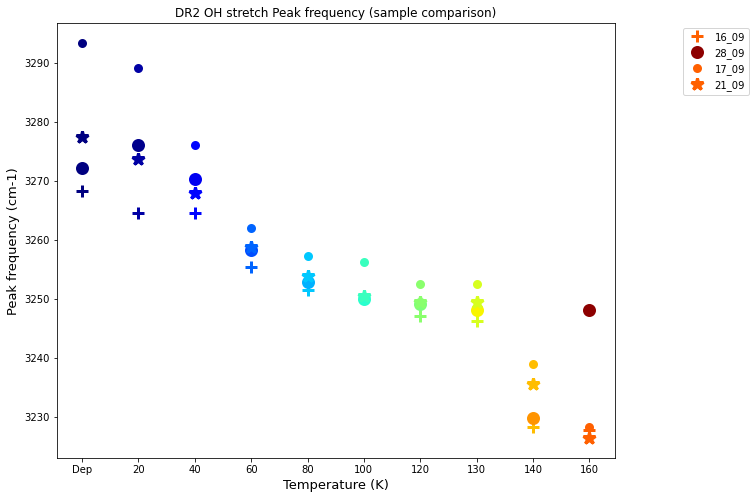

In [33]:
fig= plt.figure(figsize=(10,8))

for (k,v), (k2,v2) in zip(Td.items(), T2d.items()):

    spl1, = plt.plot(k, data_anex_df.iloc[v,17], '+', mew=3, ms=12, c=cm.jet(v/nscanTd), label= "16_09")
    spl2, = plt.plot(k2, data_anex_df_2.iloc[v2,17], 'o', mew=3, ms=10, c=cm.jet(v2/nscanT2d), label= "28_09")
    spl3, = plt.plot(k, data_anex_df_3.iloc[v,17], '.', mew=3, ms=12, c=cm.jet(v/nscanTd), label= "17_09")
    spl4, = plt.plot(k, data_anex_df_4.iloc[v,17], '*', mew=3, ms=12, c=cm.jet(v/nscanTd), label= "21_09")
    
plt.title('DR2 OH stretch Peak frequency (sample comparison)')
#plt.axis([3210,3270])
plt.xlabel('Temperature (K)').set_fontsize(13)
plt.ylabel('Peak frequency (cm-1)').set_fontsize(13)
#ax = fig.gca()
#plt.grid()
#plt.legend()
plt.legend([spl1, spl2, spl3, spl4], ["16_09", "28_09", "17_09", "21_09"],bbox_to_anchor =(1.25, 1),)

#plt.savefig('D:\DATA-Processing\PAC\{}/Compare/DR2_{}_{}_PeakA-frequency.png'.format(XP, date, date2))

plt.show()

#### Integration from normalized data

In [38]:
fig= plt.figure(figsize=(10,8))

for (k,v), (k2,v2) in zip(Td.items(), T2d.items()):

    spl1, = plt.plot(k, data_anex_df.iloc[v,30], '+', mew=3, ms=12, c=cm.jet(v/nscanTd), label= "16_09")
    spl2, = plt.plot(k2, data_anex_df_2.iloc[v2,30], 'o', mew=3, ms=10, c=cm.jet(v2/nscanT2d), label= "28_09")
    spl3, = plt.plot(k, data_anex_df_3.iloc[v,30], '.', mew=3, ms=12, c=cm.jet(v/nscanTd), label= "17_09")
    spl4, = plt.plot(k, data_anex_df_4.iloc[v,30], '*', mew=3, ms=12, c=cm.jet(v/nscanTd), label= "21_09")
    
plt.title('DR2 OH stretch Integration value (sample comparison)')
#plt.axis([3210,3270])
plt.xlabel('Temperature (K)').set_fontsize(13)
plt.ylabel('Integration (AU)').set_fontsize(13)
#ax = fig.gca()
#plt.grid()
#plt.legend()
plt.legend([spl1, spl2, spl3, spl4], ["16_09", "28_09", "17_09", "21_09"])

#plt.savefig('D:\DATA-Processing\PAC\{}/Compare/DR2_{}_{}_PeakA-frequency.png'.format(XP, date, date2))

plt.show()

# 1.3 Data chopping

## 1.3.1 Temperature list splitting

In [14]:
Temp = XP_Ramp_df_I.columns[1:].values.tolist()

In [15]:
Temp

['20K ',
 '30K',
 '40K',
 '50K',
 '60K',
 '70K',
 '80K',
 '90K',
 '100K',
 '110K',
 '120K',
 '125K',
 '130K',
 '132K',
 '134K',
 '135K',
 '136K',
 '137K',
 '138K',
 '140K',
 '142K',
 '145K',
 '150K',
 '155K',
 '160K',
 '180K',
 '200K']

iterate through temp and recover scan number value for T in range 1,2,3,4

In [16]:
T1 = Temp[0:9]
T2 = Temp[8:13]
T3 = Temp[12:20]
T4 = Temp[19:26]

### Sanity Check

In [17]:
T2

['100K', '110K', '120K', '125K', '130K']

## 1.1.3 List of sample names per range

### Range 1

In [18]:
z = []
value_1 = []
file_number1 = []

for y in T1:

    value = XP_Ramp_df_I.loc[XP_Ramp_df_I.index == date, y].values[0]
    if pd.notnull(value):
        
        value_1 = re.findall(r"[-+]?\d*\.\d+|\d+", value)
    
        for items in value_1:
        
            to_plot = str('{}_{}_{}'.format(spl, date, items))
            z.append({
                
            'Name' : str(to_plot),
            'Temp' : y,
            'Date': date,
         
            })
            
            file_number1.append(int(items))

dat1= pd.DataFrame(z)
R1_df = dat1.set_index('Name')

In [19]:
z

[{'Name': 'ASW_2021_05_24_1', 'Temp': '20K ', 'Date': '2021_05_24'},
 {'Name': 'ASW_2021_05_24_2', 'Temp': '20K ', 'Date': '2021_05_24'},
 {'Name': 'ASW_2021_05_24_3', 'Temp': '20K ', 'Date': '2021_05_24'},
 {'Name': 'ASW_2021_05_24_4', 'Temp': '70K', 'Date': '2021_05_24'},
 {'Name': 'ASW_2021_05_24_5', 'Temp': '70K', 'Date': '2021_05_24'},
 {'Name': 'ASW_2021_05_24_6', 'Temp': '70K', 'Date': '2021_05_24'},
 {'Name': 'ASW_2021_05_24_7', 'Temp': '70K', 'Date': '2021_05_24'}]

In [20]:
R1_df

,Temp,Date
Name,,
ASW_2021_05_24_1,20K,2021_05_24
ASW_2021_05_24_2,20K,2021_05_24
ASW_2021_05_24_3,20K,2021_05_24
ASW_2021_05_24_4,70K,2021_05_24
ASW_2021_05_24_5,70K,2021_05_24
ASW_2021_05_24_6,70K,2021_05_24
ASW_2021_05_24_7,70K,2021_05_24


### Range 2

In [21]:
z = []
value_1 = []
file_number2 = []

for y in T2:

    value = XP_Ramp_df_I.loc[XP_Ramp_df_I.index == date, y].values[0]
    if pd.notnull(value):
        
        value_1 = re.findall(r"[-+]?\d*\.\d+|\d+", value)
    
        for items in value_1:
        
            to_plot = str('{}_{}_{}'.format(spl, date, items))
            z.append({
                
            'Name' : str(to_plot),
            'Temp' : y,
            'Date': date,
         
            })
            
            file_number2.append(int(items))

dat2= pd.DataFrame(z)
R2_df = dat2.set_index('Name')

KeyError: "None of ['Name'] are in the columns"

In [ ]:
R2_df

### Range 3

In [22]:
z = []
value_1 = []
file_number3 = []

for y in T3:

    value = XP_Ramp_df_I.loc[XP_Ramp_df_I.index == date, y].values[0]
    if pd.notnull(value):
        
        value_1 = re.findall(r"[-+]?\d*\.\d+|\d+", value)
    
        for items in value_1:
        
            to_plot = str('{}_{}_{}'.format(spl, date, items))
            z.append({
                
            'Name' : str(to_plot),
            'Temp' : y,
            'Date': date,
         
            })
            
            file_number3.append(int(items))

dat3= pd.DataFrame(z)
R3_df = dat3.set_index('Name')

In [23]:
R3_df

,Temp,Date
Name,,
ASW_2021_05_24_8,135K,2021_05_24
ASW_2021_05_24_9,135K,2021_05_24
ASW_2021_05_24_10,135K,2021_05_24
ASW_2021_05_24_11,135K,2021_05_24
ASW_2021_05_24_12,135K,2021_05_24
...,...,...
ASW_2021_05_24_414,140K,2021_05_24
ASW_2021_05_24_415,140K,2021_05_24
ASW_2021_05_24_416,140K,2021_05_24


### Range 4

In [24]:
z = []
value_1 = []
file_number4 = []

for y in T4:

    value = XP_Ramp_df_I.loc[XP_Ramp_df_I.index == date, y].values[0]
    if pd.notnull(value):
        
        value_1 = re.findall(r"[-+]?\d*\.\d+|\d+", value)
    
        for items in value_1:
        
            to_plot = str('{}_{}_{}'.format(spl, date, items))
            z.append({
                
            'Name' : str(to_plot),
            'Temp' : y,
            'Date': date,
         
            })
            
            file_number4.append(int(items))

dat4= pd.DataFrame(z)
R4_df = dat4.set_index('Name')

In [25]:
R4_df

,Temp,Date
Name,,
ASW_2021_05_24_393,140K,2021_05_24
ASW_2021_05_24_394,140K,2021_05_24
ASW_2021_05_24_395,140K,2021_05_24
ASW_2021_05_24_396,140K,2021_05_24
ASW_2021_05_24_397,140K,2021_05_24
...,...,...
ASW_2021_05_24_495,145K,2021_05_24
ASW_2021_05_24_496,145K,2021_05_24
ASW_2021_05_24_497,145K,2021_05_24


# 1.4 Plotting

Plot 4 subplot in square formating for all 4 T range

## 1.4.1 T ranges

## Gridspec

NameError: name 'R2_df' is not defined

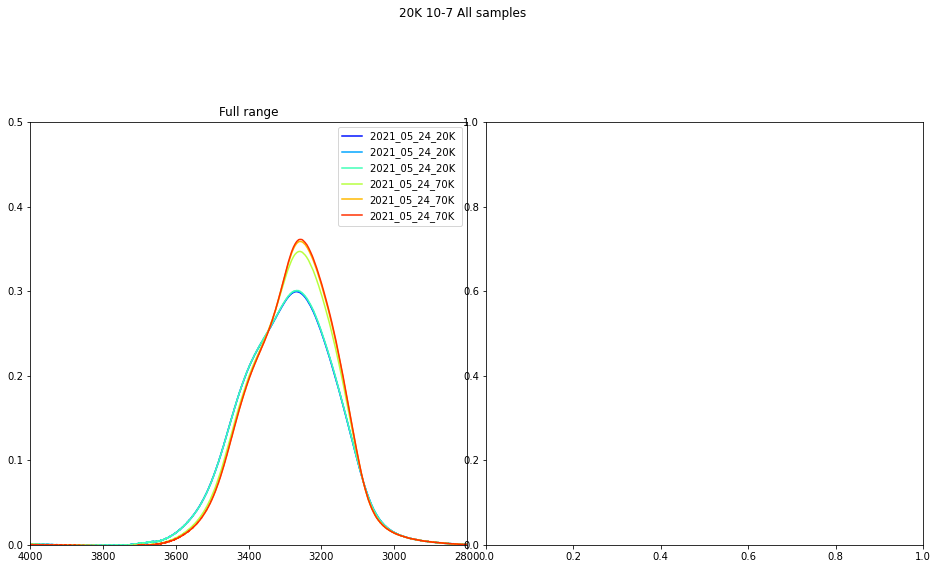

In [26]:
gs = gridspec.GridSpec(16, 16,hspace=0.8,wspace=0.5)

fig = plt.figure(figsize=(16,16))

fig.suptitle('20K 10-7 All samples')

ax1 = fig.add_subplot(gs[0:8, 0:8]) # row 0, col 0

nscan = len(list(R1_df['Date'].values.tolist()))


j = 1
for i, j in zip(dat1['Name'], range(1,nscan)):   
#    for iscan in range(1,nscan):
#DR2

    #x = DR2_Allscans_full.Wavenumber
    #y = DR2_Allscans_full['{}'.format(i)]

    x = DR3_Allscan_df.Wavenumber
    y = DR3_Allscan_df['{}'.format(i)]
    
    plt.plot(x,y, label="{}_{}".format(str(R1_df.loc[i]['Date']), str(R1_df.loc[i]['Temp'])), c=cm.jet(j/nscan)) 
    
    j=+1
ax1.set_title('Full range')
ax1.axis([4000, 2800, 0, 0.5])

plt.legend()

ax2 = fig.add_subplot(gs[0:8, 8:16]) # row 0, col 0
nscan = len(list(R2_df['Date'].values.tolist()))


j = 1
for i, j in zip(dat2['Name'], range(1,nscan)):   
#    for iscan in range(1,nscan):
#DR2

    #x = DR2_Allscans_full.Wavenumber
    #y = DR2_Allscans_full['{}'.format(i)]

    x = DR3_Allscan_df.Wavenumber
    y = DR3_Allscan_df['{}'.format(i)]
    
    plt.plot(x,y, label="{}_{}".format(str(R2_df.loc[i]['Date']), str(R2_df.loc[i]['Temp'])), c=cm.jet(j/nscan)) 
    
    j=+1
ax2.set_title('Normalized zoom')
ax2.margins(2, 2)     
ax2.axis([4000, 2800, 0, 0.5])

plt.legend()

ax3 = fig.add_subplot(gs[8:16, 0:8]) # row 0, col 0  

nscan = len(list(R3_df['Date'].values.tolist()))


j = 1
for i, j in zip(dat3['Name'], range(1,nscan)):   
#    for iscan in range(1,nscan):
#DR2

    #x = DR2_Allscans_full.Wavenumber
    #y = DR2_Allscans_full['{}'.format(i)]

    x = DR3_Allscan_df.Wavenumber
    y = DR3_Allscan_df['{}'.format(i)]
    
    plt.plot(x,y, label="{}_{}".format(str(R3_df.loc[i]['Date']), str(R3_df.loc[i]['Temp'])), c=cm.jet(j/nscan)) 
    
    j=+1

ax3.set_title('BC zoomed')
ax3.axis([4000, 2800, 0, 0.5])

plt.legend()

ax4 = fig.add_subplot(gs[8:16, 8:16]) # row 0, col 0  

nscan = len(list(R4_df['Date'].values.tolist()))


j = 1
for i, j in zip(dat4['Name'], range(1,nscan)):   
#    for iscan in range(1,nscan):
#DR2

    #x = DR2_Allscans_full.Wavenumber
    #y = DR2_Allscans_full['{}'.format(i)]

    x = DR3_Allscan_df.Wavenumber
    y = DR3_Allscan_df['{}'.format(i)]
    
    plt.plot(x,y, label="{}_{}".format(str(R4_df.loc[i]['Date']), str(R4_df.loc[i]['Temp'])), c=cm.jet(j/nscan)) 
    
    j=+1

ax4.set_title('BC zoomed')
ax4.axis([4000, 2800, 0, 0.5])

plt.legend()

plt.show()

insert condition to supress first scan (ramp)
Implement maxA 
Increase spacing between plots

## Other plot

### Different DR Outputs

# 1.6 Scan Averaging and error analysis ?

Supress the first scan and average the remaining scan 

Have a though about error bars

# 1.7 Data processing

## 1.7.1 Linear regression of desorption

This is where some fitting options needs to be implemented ie:

- linear regression for desorption data
- Polynomial for isotherms at 130, 135K ?


## 1.7.2 polynomial fitting of isotherm at 130K

Goal,

# <span style='background :yellow' > $\color{green}{\text{DP2 : Substraction scan}}$ </span>

use DR2 data

Purpose here is to obtain 4 different substraction spectra for each of the presestablished range (use hot-warm color to plot)

## 2.1 Data Sanity Check

In [27]:
DR2_Allscan_df

,Wavenumber,ASW_2021_05_24_1,ASW_2021_05_24_2,ASW_2021_05_24_3,ASW_2021_05_24_4,ASW_2021_05_24_5,ASW_2021_05_24_6,ASW_2021_05_24_7,ASW_2021_05_24_8,ASW_2021_05_24_9,...,ASW_2021_05_24_483,ASW_2021_05_24_484,ASW_2021_05_24_485,ASW_2021_05_24_486,ASW_2021_05_24_487,ASW_2021_05_24_488,ASW_2021_05_24_489,ASW_2021_05_24_490,ASW_2021_05_24_491,ASW_2021_05_24_492
0,799.8442,6.517882e-02,6.611663e-02,6.766044e-02,7.767758e-02,8.016905e-02,8.028784e-02,0.079780,7.776978e-02,7.765637e-02,...,0.048800,0.048767,0.048408,0.049178,0.047778,0.051763,0.052555,0.055020,0.056034,0.061171
1,800.3264,6.945459e-02,6.969134e-02,7.088943e-02,7.296595e-02,7.390441e-02,7.500930e-02,0.074624,7.745363e-02,7.897147e-02,...,0.052965,0.053671,0.052923,0.054063,0.053984,0.055621,0.057292,0.059009,0.059942,0.066201
2,800.8085,7.292112e-02,7.288691e-02,7.361745e-02,6.737457e-02,6.700571e-02,6.841946e-02,0.068437,7.570509e-02,7.891863e-02,...,0.056586,0.057301,0.056603,0.057588,0.059036,0.058832,0.060971,0.062315,0.063480,0.070444
3,801.2906,6.940653e-02,6.975350e-02,7.111548e-02,6.573625e-02,6.443463e-02,6.554944e-02,0.066081,7.037464e-02,7.083752e-02,...,0.051400,0.051448,0.051381,0.052487,0.053773,0.053324,0.055295,0.055882,0.058406,0.063919
4,801.7727,6.659455e-02,6.678519e-02,6.828554e-02,6.814425e-02,6.737859e-02,6.831091e-02,0.068845,6.914572e-02,6.787662e-02,...,0.046206,0.046325,0.046060,0.047885,0.049168,0.048616,0.049703,0.050537,0.053893,0.058902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6636,3998.2570,6.052594e-04,6.155879e-04,5.891753e-04,4.509248e-04,3.057191e-04,3.017703e-04,0.000373,3.303686e-04,5.509026e-04,...,0.000525,0.000569,0.000513,0.000519,0.000521,0.000546,0.000569,0.000509,0.000523,0.000514
6637,3998.7390,3.875527e-04,3.993715e-04,3.591537e-04,2.900099e-04,1.944961e-04,1.994642e-04,0.000299,2.035522e-04,3.159683e-04,...,0.000346,0.000352,0.000322,0.000330,0.000345,0.000352,0.000361,0.000334,0.000336,0.000338
6638,3999.2210,-8.673617e-19,-4.336809e-19,-2.168404e-19,-3.469447e-18,-1.301043e-18,3.469447e-18,0.000121,2.168404e-18,1.734723e-18,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6639,3999.7030,7.357823e-04,7.429329e-04,7.613905e-04,3.697233e-04,6.489695e-05,1.846985e-05,0.000126,1.990229e-04,7.767737e-04,...,0.000430,0.000447,0.000411,0.000422,0.000424,0.000413,0.000430,0.000414,0.000451,0.000435


In [28]:
wavelength = DR2_Allscan_df.T.iloc[0]

In [29]:
wavelength

0        799.8442
1        800.3264
2        800.8085
3        801.2906
4        801.7727
          ...    
6636    3998.2570
6637    3998.7390
6638    3999.2210
6639    3999.7030
6640    4000.1850
Name: Wavenumber, Length: 6641, dtype: float64

## 2.2  Function definition

In [30]:
def substraction(index1, date, index2):
    
#    exp_date1 = input('date of experiment 1 (format YYYY_MM_DD) = ')
#    index1 = int(input('index 1 = '))
#    exp_date2 = input('date of experiment 2 (format YYYY_MM_DD) = ')
#    index2 = int(input('index 2 = '))
    
    data1 = DR2_Allscan_df
    #data2 = pd.read_csv('D:\PhD-WS\Projects\PAC\{}}\DATA\{0}\Data\DR2_{}_All_data.csv'.format(XP,date))

    data1 = data1.T.iloc[1:].T
    #data2 = data2.T.iloc[1:].T
    
    
#Scan 1    
    
    list_name1 =  list(data1.columns.values.tolist())
    
    scan_place1 = 0
    
    for i in range(len(list_name1)):
                
        name_corr = list_name1[i].split('_')
        
        if int(name_corr[-1]) == int(index1):
    
            scan_place1 = i
    
    scan1 = data1.T.iloc[scan_place1]
    
#Scan 2    
    
    list_name2 =  list(data1.columns.values.tolist())
    
    scan_place2 = 0
    
    for i in range(len(list_name2)):
        
        name_corr = list_name2[i].split('_')
        
        if int(name_corr[-1]) == int(index2):
    
            scan_place2 = i
    
    scan2 = data1.T.iloc[scan_place2]
    
    sub_scan = numpy.zeros(len(scan1))
    
    for iscan in range(len(sub_scan)):
        
        sub_scan[iscan] = scan2[iscan] - scan1[iscan]
    
    return sub_scan

## 2.3 Plotting

### All Range

492


C:\Users\vmrd3\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


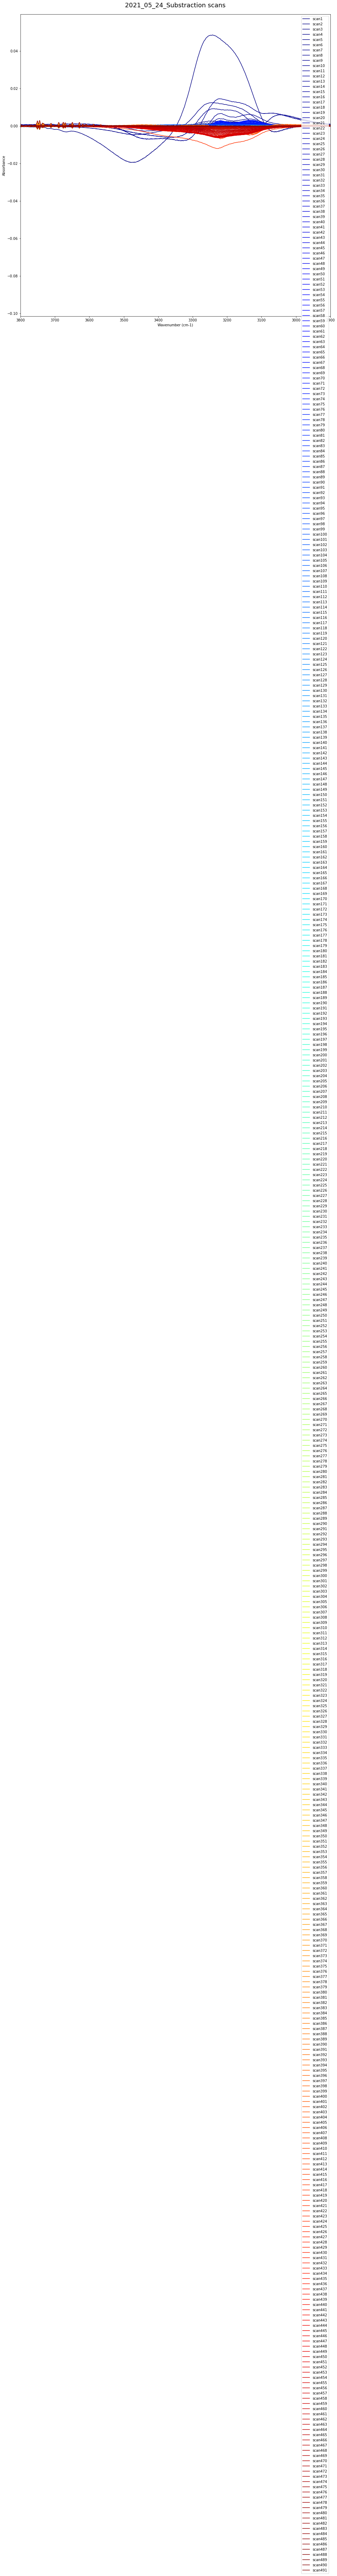

In [31]:
#date = "2020_09_15"

data1 = DR2_Allscan_df


data1 = data1.T.iloc[1:].T
    
#data = data.T.iloc[1:].T
#data = data1


nscan = len(list(data1.columns.values.tolist()))

print(nscan)
#print(data1)


fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot()


ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Absorbance')
#ax.set_zlabel('Absorbance')

data_sub = []
data_sub_2 =[]

for iscan in range(nscan-1):
    
    iscan = iscan+1
     
    sub_scan = substraction(iscan, date, iscan+1)
    
    df = pd.DataFrame({'Wavenumber': wavelength, "ASW_"+str(date)+"_" + str(iscan) +"-" + str(iscan+1): sub_scan})
    
    #df.to_csv('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\{}\Data\DP1\DP1_{}_sub-scan_{}.csv'.format(date,date, iscan))
    
    #data_int.append(df)
    
    
    data_sub.append(
        
        {
            

            'Name' : "ASW_"+str(date)+"_" + str(iscan) +"-" + str(iscan+1),
            'Wavenumber' : wavelength,
            'sub_scan' : sub_scan,

        }) 
    
    data_sub_2.append(df)
    


    plt.plot(wavelength, sub_scan, c=cm.jet(iscan/nscan), label = "scan{0}".format(str(iscan)))
       

plt.title('{}_Substraction scans'.format(date), pad=20).set_fontsize(18)
ax.hlines(0,3900,2900)
plt.xlim([3800,2900])
plt.legend()
plt.show()

### Range 1

Insert condition to use only items present in range 1 

492


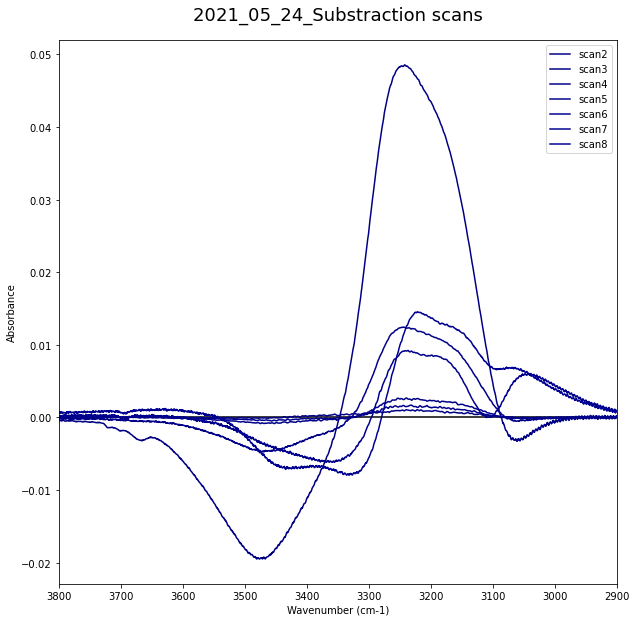

In [32]:
#date = "2020_09_15"

data1 = DR2_Allscan_df


data1 = data1.T.iloc[1:].T
    
#data = data.T.iloc[1:].T
#data = data1


nscan = len(list(data1.columns.values.tolist()))

print(nscan)
#print(data1)


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()


ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Absorbance')
#ax.set_zlabel('Absorbance')

data_sub = []
data_sub_2 =[]

for iscan in file_number1:
    
    iscan = iscan+1
     
    sub_scan = substraction(iscan, date, iscan+1)
    
    df = pd.DataFrame({'Wavenumber': wavelength, "ASW_"+str(date)+"_" + str(iscan) +"-" + str(iscan+1): sub_scan})
    
    #df.to_csv('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\{}\Data\DP1\DP1_{}_sub-scan_{}.csv'.format(date,date, iscan))
    
    #data_int.append(df)
    
    
    data_sub.append(
        
        {
            

            'Name' : "ASW_"+str(date)+"_" + str(iscan) +"-" + str(iscan+1),
            'Wavenumber' : wavelength,
            'sub_scan' : sub_scan,

        }) 
    
    data_sub_2.append(df)
    


    plt.plot(wavelength, sub_scan, c=cm.jet(iscan/nscan), label = "scan{0}".format(str(iscan)))
       

plt.title('{}_Substraction scans'.format(date), pad=20).set_fontsize(18)
ax.hlines(0,3900,2900)
plt.xlim([3800,2900])
plt.legend()
plt.show()

In [33]:
df

,Wavenumber,ASW_2021_05_24_8-9
0,799.8442,-1.134107e-04
1,800.3264,1.517846e-03
2,800.8085,3.213542e-03
3,801.2906,4.628880e-04
4,801.7727,-1.269106e-03
...,...,...
6636,3998.2570,2.205339e-04
6637,3998.7390,1.124161e-04
6638,3999.2210,-4.336809e-19
6639,3999.7030,5.777508e-04


In [34]:
data_sub

[{'Name': 'ASW_2021_05_24_2-3',
  'Wavenumber': 0        799.8442
  1        800.3264
  2        800.8085
  3        801.2906
  4        801.7727
            ...    
  6636    3998.2570
  6637    3998.7390
  6638    3999.2210
  6639    3999.7030
  6640    4000.1850
  Name: Wavenumber, Length: 6641, dtype: float64,
  'sub_scan': array([1.54380954e-03, 1.19808933e-03, 7.30539117e-04, ...,
         2.16840434e-19, 1.84575997e-05, 1.99932794e-05])},
 {'Name': 'ASW_2021_05_24_3-4',
  'Wavenumber': 0        799.8442
  1        800.3264
  2        800.8085
  3        801.2906
  4        801.7727
            ...    
  6636    3998.2570
  6637    3998.7390
  6638    3999.2210
  6639    3999.7030
  6640    4000.1850
  Name: Wavenumber, Length: 6641, dtype: float64,
  'sub_scan': array([ 1.00171360e-02,  2.07651706e-03, -6.24288189e-03, ...,
         -3.25260652e-18, -3.91667293e-04, -7.19573885e-04])},
 {'Name': 'ASW_2021_05_24_4-5',
  'Wavenumber': 0        799.8442
  1        800.3264
  2     

In [35]:
data_sub_2

[      Wavenumber  ASW_2021_05_24_2-3
 0       799.8442        1.543810e-03
 1       800.3264        1.198089e-03
 2       800.8085        7.305391e-04
 3       801.2906        1.361979e-03
 4       801.7727        1.500349e-03
 ...          ...                 ...
 6636   3998.2570       -2.641260e-05
 6637   3998.7390       -4.021780e-05
 6638   3999.2210        2.168404e-19
 6639   3999.7030        1.845760e-05
 6640   4000.1850        1.999328e-05
 
 [6641 rows x 2 columns],
       Wavenumber  ASW_2021_05_24_3-4
 0       799.8442        1.001714e-02
 1       800.3264        2.076517e-03
 2       800.8085       -6.242882e-03
 3       801.2906       -5.379231e-03
 4       801.7727       -1.412898e-04
 ...          ...                 ...
 6636   3998.2570       -1.382505e-04
 6637   3998.7390       -6.914371e-05
 6638   3999.2210       -3.252607e-18
 6639   3999.7030       -3.916673e-04
 6640   4000.1850       -7.195739e-04
 
 [6641 rows x 2 columns],
       Wavenumber  ASW_2021_05_2

### Range 2

31


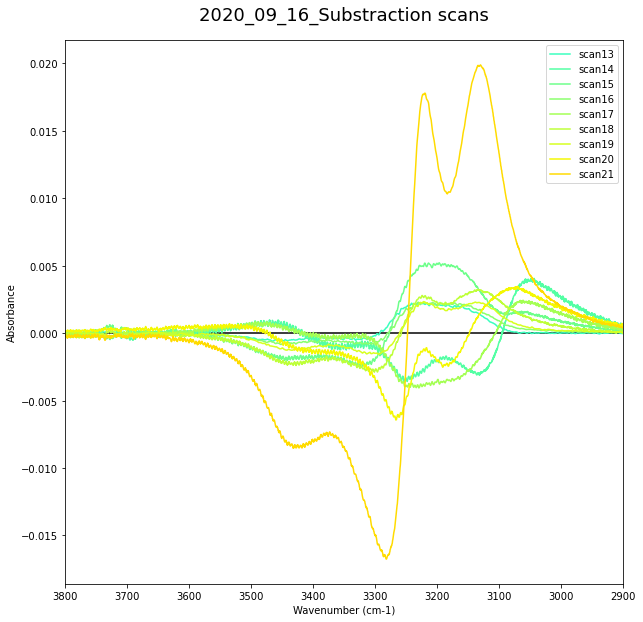

In [35]:
#date = "2020_09_15"

data1 = DR2_Allscan_df


data1 = data1.T.iloc[1:].T
    
#data = data.T.iloc[1:].T
#data = data1


nscan = len(list(data1.columns.values.tolist()))

print(nscan)
#print(data1)


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()


ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Absorbance')
#ax.set_zlabel('Absorbance')

data_sub = []
data_sub_2 =[]

for iscan in file_number2:
    
    iscan = iscan+1
     
    sub_scan = substraction(iscan, date, iscan+1)
    
    df = pd.DataFrame({'Wavenumber': wavelength, "ASW_"+str(date)+"_" + str(iscan) +"-" + str(iscan+1): sub_scan})
    
    #df.to_csv('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\{}\Data\DP1\DP1_{}_sub-scan_{}.csv'.format(date,date, iscan))
    
    #data_int.append(df)
    
    
    data_sub.append(
        
        {
            

            'Name' : "ASW_"+str(date)+"_" + str(iscan) +"-" + str(iscan+1),
            'Wavenumber' : wavelength,
            'sub_scan' : sub_scan,

        }) 
    
    data_sub_2.append(df)
    


    plt.plot(wavelength, sub_scan, c=cm.jet(iscan/nscan), label = "scan{0}".format(str(iscan)))
       

plt.title('{}_Substraction scans'.format(date), pad=20).set_fontsize(18)
ax.hlines(0,3900,2900)
plt.xlim([3800,2900])
plt.legend()
plt.show()

### Range 3

492


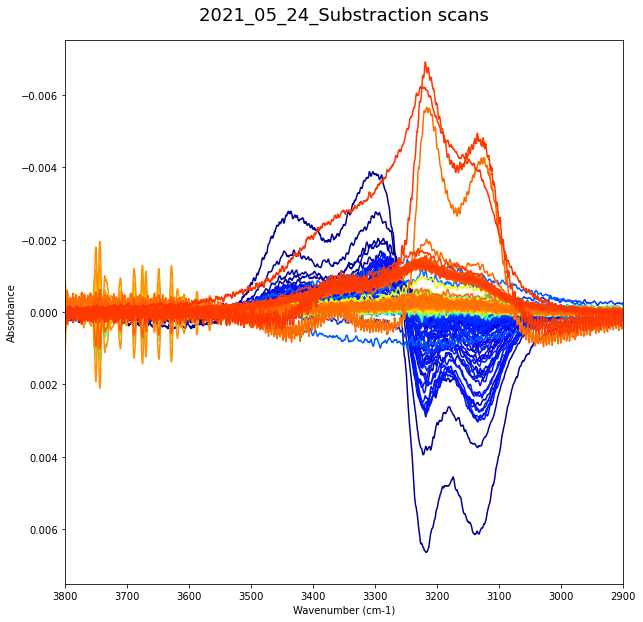

In [41]:
#date = "2020_09_15"

data1 = DR2_Allscan_df


data1 = data1.T.iloc[1:].T
    
#data = data.T.iloc[1:].T
#data = data1


nscan = len(list(data1.columns.values.tolist()))

print(nscan)
#print(data1)


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()


ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Absorbance')
#ax.set_zlabel('Absorbance')

data_sub = []
data_sub_2 =[]

for iscan in file_number3:
    
    iscan = iscan+1
     
    sub_scan = substraction(iscan, date, iscan+1)
    
    df = pd.DataFrame({'Wavenumber': wavelength, "ASW_"+str(date)+"_" + str(iscan) +"-" + str(iscan+1): sub_scan})
    
    #df.to_csv('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\{}\Data\DP1\DP1_{}_sub-scan_{}.csv'.format(date,date, iscan))
    
    #data_int.append(df)
    
    
    data_sub.append(
        
        {
            

            'Name' : "ASW_"+str(date)+"_" + str(iscan) +"-" + str(iscan+1),
            'Wavenumber' : wavelength,
            'sub_scan' : sub_scan,

        }) 
    
    data_sub_2.append(df)
    


    plt.plot(wavelength, sub_scan, c=cm.jet(iscan/nscan), label = "scan{0}".format(str(iscan)))
       

plt.title('{}_Substraction scans'.format(date), pad=20).set_fontsize(18)
ax.hlines(0,3900,2900)
plt.xlim([3800,2900])
plt.ylim([-0.0075,0.0075])
#plt.legend()
plt.show()

### Range 4

492


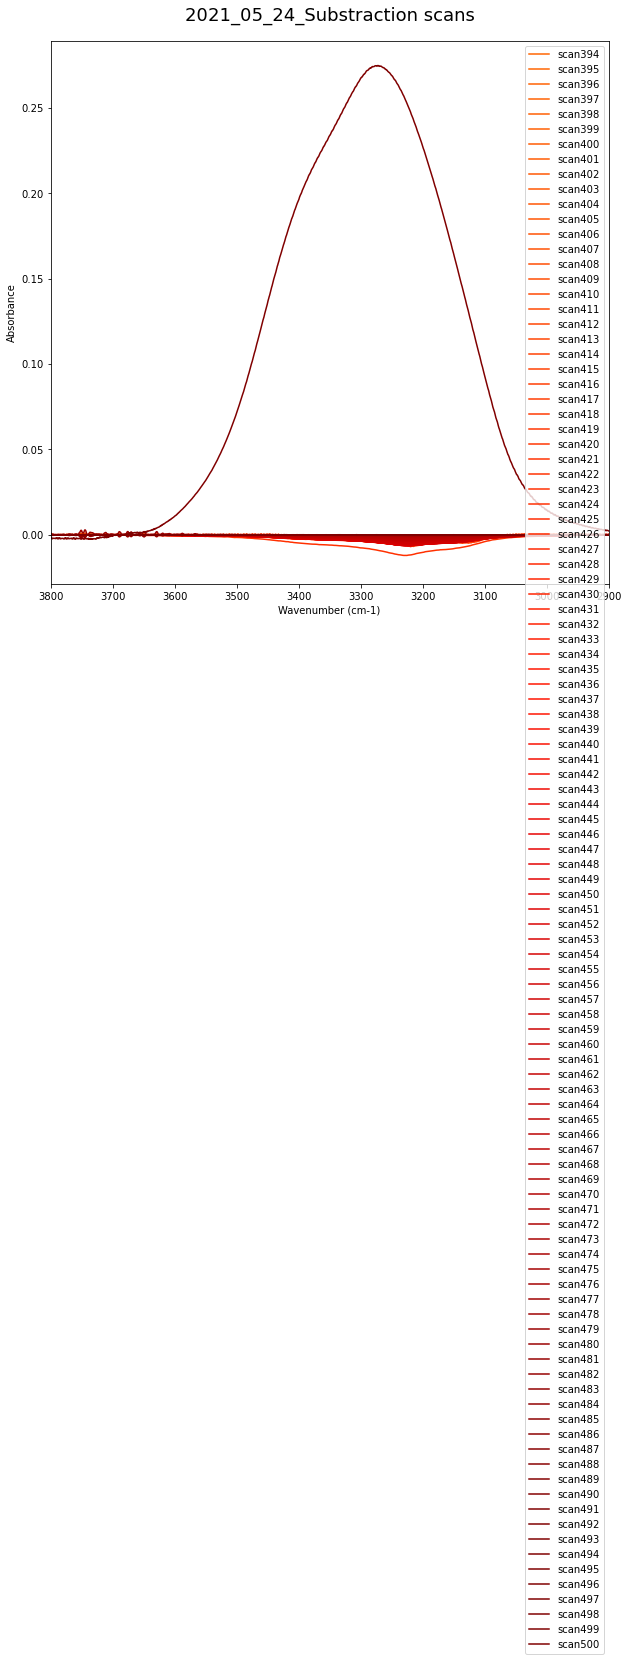

In [37]:
#date = "2020_09_15"

data1 = DR2_Allscan_df


data1 = data1.T.iloc[1:].T
    
#data = data.T.iloc[1:].T
#data = data1


nscan = len(list(data1.columns.values.tolist()))

print(nscan)
#print(data1)


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()


ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Absorbance')
#ax.set_zlabel('Absorbance')

data_sub = []
data_sub_2 =[]

for iscan in file_number4:
    
    iscan = iscan+1
     
    sub_scan = substraction(iscan, date, iscan+1)
    
    df = pd.DataFrame({'Wavenumber': wavelength, "ASW_"+str(date)+"_" + str(iscan) +"-" + str(iscan+1): sub_scan})
    
    #df.to_csv('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\{}\Data\DP1\DP1_{}_sub-scan_{}.csv'.format(date,date, iscan))
    
    #data_int.append(df)
    
    
    data_sub.append(
        
        {
            

            'Name' : "ASW_"+str(date)+"_" + str(iscan) +"-" + str(iscan+1),
            'Wavenumber' : wavelength,
            'sub_scan' : sub_scan,

        }) 
    
    data_sub_2.append(df)
    


    plt.plot(wavelength, sub_scan, c=cm.jet(iscan/nscan), label = "scan{0}".format(str(iscan)))
       

plt.title('{}_Substraction scans'.format(date), pad=20).set_fontsize(18)
ax.hlines(0,3900,2900)
plt.xlim([3800,2900])
plt.legend()
plt.show()

## Preliminary analysis 

Purpose here would be (for the different physical processes that the ice undergo upon annealing) to investigate the different contributions lost and gain from the substraction spectra

This will subsequently be used as initial guesses for the gaussian fit of the whole samples

An intermediate gaussian fitting routine could be implemented here with the substraction spectra

## Export Data Sub as csv

### Concatenation

In [ ]:
data_sub

In [ ]:
data_sub_2_df  = reduce(lambda left,right: pd.merge(left,right, on=['Wavenumber'],how='outer'), data_sub_2)

## Export as csv

# <span style='background :yellow' > $\color{green}{\text{DP3 : Gaussian Fitting}}$ </span>

[Lmfit web-site - Example](https://lmfit.github.io/lmfit-py/builtin_models.html#example-3-fitting-multiple-peaks-and-using-prefixes)

## What Data ?

### Substraction scan

Later

### OH Stretch

In [ ]:
DR2_A_df = DR2_df[4149:6639]

In [ ]:
DR2_A_df

## Gaussian fit 1

In [42]:

x = DR2_A_df["Wavenumber"]
y = DR2_A_df["ASW_2020_09_16_1"]

pars = exp_mod.guess(y, x=x)

gauss1 = GaussianModel(prefix='g1_')
pars.update(gauss1.make_params())

pars['g1_center'].set(value=3400, min=3300, max=3500)
pars['g1_sigma'].set(value=15, min=3)
pars['g1_amplitude'].set(value=10, min=1)

gauss2 = GaussianModel(prefix='g2_')
pars.update(gauss2.make_params())

pars['g2_center'].set(value=3260, min=3200, max=3300)
pars['g2_sigma'].set(value=15, min=3)
pars['g2_amplitude'].set(value=10, min=1)

mod = gauss1 + gauss2 

init = mod.eval(pars, x=x)
out = mod.fit(y, pars, x=x)

print(out.fit_report(min_correl=0.5))

fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(x, y, 'b')
axes[0].plot(x, init, 'k--', label='initial fit')
axes[0].plot(x, out.best_fit, 'r-', label='best fit')
axes[0].invert_xaxis()
axes[0].legend(loc='best')

comps = out.eval_components(x=x)
axes[1].plot(x, y, 'b')
axes[1].plot(x, comps['g1_'], 'g--', label='Gaussian component 1')
axes[1].plot(x, comps['g2_'], 'm--', label='Gaussian component 2')
axes[1].invert_xaxis()
axes[1].legend(loc='best')

plt.show()
# <end examples/doc_builtinmodels_nistgauss.py>

NameError: name 'DR2_A_df' is not defined